# Creating combined AGAGE files

Before you run this tutorial, make sure you've run the setup script to create your config file.

In [5]:
import json

from agage_archive.io import read_agage, read_ale_gage, output_dataset, combine_datasets
from agage_archive.processing import format_dataset, format_variables, format_species, lookup_locals_and_attrs, format_attributes, lookup_username


To read AGAGE netCDF files, use the read_agage function. E.g.:

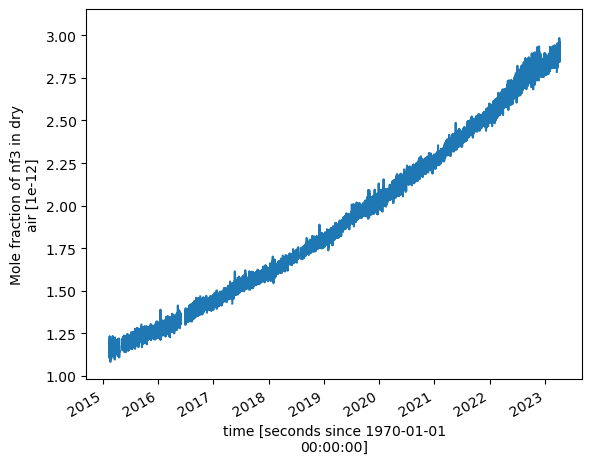

In [6]:
ds_agage = read_agage("NF3", "CGO", "GCMS-Medusa")
ds_agage.mf.plot()

In [7]:
ds_agage

<xarray.Dataset>
Dimensions:           (time: 65411)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-21T00:38:00 ... 2023-04-1...
Data variables:
    mf                (time) float32 nan nan nan nan ... 2.883 2.899 2.887 2.899
    mf_repeatability  (time) float32 nan nan nan nan ... 0.01291 0.01286 0.01383
    inlet_height      (time) float16 10.0 10.0 10.0 10.0 ... 70.0 70.0 70.0 70.0
    sampling_period   (time) float16 1.2e+03 1.2e+03 1.2e+03 ... 1.2e+03 1.2e+03
Attributes: (12/23)
    comment:                    AGAGE GCMS-Medusa measurements. Output from G...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    ...                         ...
    instrument:                 agilent_5975
    instrument_date:            2012-08-01 00:00:00
    instrument_comment:         upgraded MSD detector with generally improved...
    instrument_1:               agilent_5973
    instrument_date_1:          2004-01-01 00:00:00
    instrument_comment_1:       original MSD detector

Similarly, ALE or GAGE data can be read using:

In [13]:
ds_gage = read_ale_gage("CH3CCl3", "CGO", "GAGE")

In [15]:
ds_gage

<xarray.Dataset>
Dimensions:           (time: 50142)
Coordinates:
  * time              (time) datetime64[ns] 1981-11-30T13:01:00 ... 1994-12-2...
Data variables:
    mf                (time) float32 nan nan nan nan ... 101.3 101.2 101.7 100.7
    mf_repeatability  (time) float32 nan nan nan nan ... 2.026 2.024 2.034 2.014
    inlet_height      (time) float16 70.0 70.0 70.0 70.0 ... 70.0 70.0 70.0 70.0
    sampling_period   (time) float16 30.0 30.0 30.0 30.0 ... 30.0 30.0 30.0 30.0
Attributes: (12/20)
    comment:                    GAGE CH3CCl3 data from Kennaook/Cape Grim, Ta...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    ...                         ...
    site_code:                  CGO
    network:                    GAGE
    doi:                        
    instrument:                 GAGE_GCMD
    instrument_date:            1981-11-30
    instrument_comment:

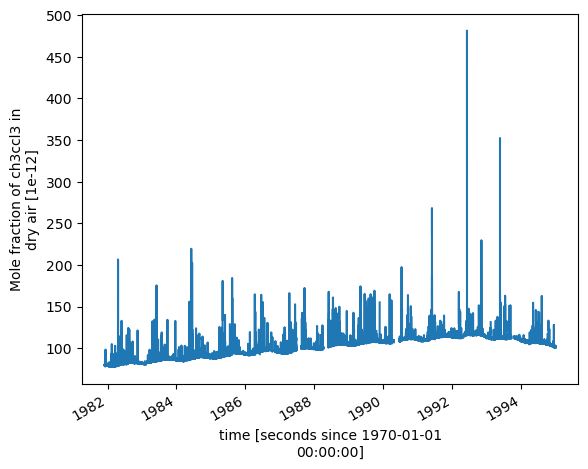

In [16]:
ds_gage.mf.plot()

The ```combine_datasets``` function calls these functions, based on the order in which they are specified in ```data/data_selector.json```.

Here, we will create a CH3CCl3 timeseries from CGO ALE, GAGE, GCMD and Medusa data:

In [ ]:
ds = combine_datasets("CH3CCl3", "CGO", scale="SIO-05")

In [ ]:
ds

In [ ]:
ds.mf.plot()

To output the file to the output directory, use the ```output_dataset``` function:

In [ ]:
output_dataset(ds, network="AGAGE", instrument="combined")

Now try a species that's only measured on the Medusa:

In [ ]:
ds = combine_datasets("NF3", "CGO", scale=None)

In [ ]:
ds

In [ ]:
output_dataset(ds, network="AGAGE", instrument="GCMS-Medusa")